# Develop a Python-based data analysis project to examine coffee shop sales trends, customer purchasing behavior, and product popularity across different store locations.

## importing necessary libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



## Load the dataset

In [3]:
df= pd.read_csv(r"C:\Users\kingzuzu\Desktop\Coffee Shop Sales.csv")
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,1/1/2023,7:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,1/1/2023,7:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,1/1/2023,7:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,1/1/2023,7:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,6/30/2023,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,6/30/2023,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,6/30/2023,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,6/30/2023,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


## Data types

In [4]:
df.dtypes  

transaction_id        int64
transaction_date     object
transaction_time     object
transaction_qty       int64
store_id              int64
store_location       object
product_id            int64
unit_price          float64
product_category     object
product_type         object
product_detail       object
dtype: object

## identify missing value 

In [5]:
pd.isnull(df).any()

transaction_id      False
transaction_date    False
transaction_time    False
transaction_qty     False
store_id            False
store_location      False
product_id          False
unit_price          False
product_category    False
product_type        False
product_detail      False
dtype: bool

## Null Value

In [6]:
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

## Checking count of Min, Max etc

In [7]:
df.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219
std,43153.600016,0.542509,2.074241,17.930020,2.658723
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000
max,149456.000000,8.000000,8.000000,87.000000,45.000000


## What is the total revenue generated by each store location?

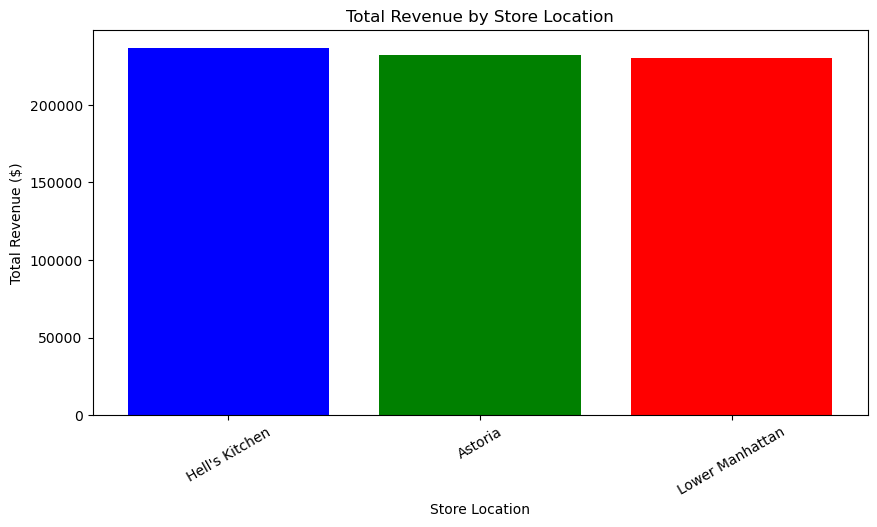

In [8]:
# Calculate revenue for each transaction
df["revenue"] = df["transaction_qty"] * df["unit_price"]

# Group by store location and sum the revenue
revenue_by_store = df.groupby("store_location")["revenue"].sum().reset_index()
revenue_by_store = revenue_by_store.sort_values(by="revenue", ascending=False)
plt.figure(figsize=(10, 5))
plt.bar(revenue_by_store["store_location"], revenue_by_store["revenue"], color=['blue', 'green', 'red'])
plt.xlabel("Store Location")
plt.ylabel("Total Revenue ($)")
plt.title("Total Revenue by Store Location")
plt.xticks(rotation=30)
plt.show()












## Which product category generates the highest revenue?

In [9]:
# Calculate revenue for each transaction
df["revenue"] = df["transaction_qty"] * df["unit_price"]

# Group by product category and sum the revenue
revenue_by_category = df.groupby("product_category")["revenue"].sum().reset_index()

# Sort by revenue in descending order
revenue_by_category = revenue_by_category.sort_values(by="revenue", ascending=False)

# Display the result
print(revenue_by_category)

     product_category    revenue
2              Coffee  269952.45
8                 Tea  196405.95
0              Bakery   82315.64
4  Drinking Chocolate   72416.00
3        Coffee beans   40085.25
1             Branded   13607.00
6           Loose Tea   11213.60
5            Flavours    8408.80
7  Packaged Chocolate    4407.64


## What are the top 5 most sold products based on transaction quantity?

In [10]:
# Group by product detail and sum the transaction quantity
top_products = df.groupby("product_detail")["transaction_qty"].sum().reset_index()

# Sort by transaction quantity in descending order
top_products = top_products.sort_values(by="transaction_qty", ascending=False)

# Display the top 5 most sold products
print(top_products.head(5))

             product_detail  transaction_qty
24             Earl Grey Rg             4708
20        Dark chocolate Lg             4668
54  Morning Sunrise Chai Rg             4643
47                    Latte             4602
64            Peppermint Rg             4564


## What are the peak sales hours across all stores?

In [11]:
# Convert transaction_time to datetime format and extract the hour
df["transaction_time"] = pd.to_datetime(df["transaction_time"], format="%H:%M:%S")
df["hour"] = df["transaction_time"].dt.hour

# Group by hour and sum the transaction quantity
sales_by_hour = df.groupby("hour")["transaction_qty"].sum().reset_index()

# Sort by transaction quantity in descending order
sales_by_hour = sales_by_hour.sort_values(by="transaction_qty", ascending=False)

# Display the sorted sales by hour
print(sales_by_hour)

    hour  transaction_qty
4     10            26713
3      9            25370
2      8            25197
1      7            19449
5     11            14035
9     15            12923
8     14            12907
10    16            12881
11    17            12700
6     12            12690
7     13            12439
12    18            10826
13    19             8595
0      6             6865
14    20              880


## Which store location has the highest average transaction value?

In [12]:
# Calculate total revenue per transaction
df["revenue"] = df["transaction_qty"] * df["unit_price"]

# Group by store location and calculate average transaction value
avg_transaction_value = df.groupby("store_location")["revenue"].mean().reset_index()

# Sort by average transaction value in descending order
avg_transaction_value = avg_transaction_value.sort_values(by="revenue", ascending=False)

# Display the result
print(avg_transaction_value)

    store_location   revenue
2  Lower Manhattan  4.814726
1   Hell's Kitchen  4.661696
0          Astoria  4.589891


## What is the trend of total sales over time (daily or monthly)?

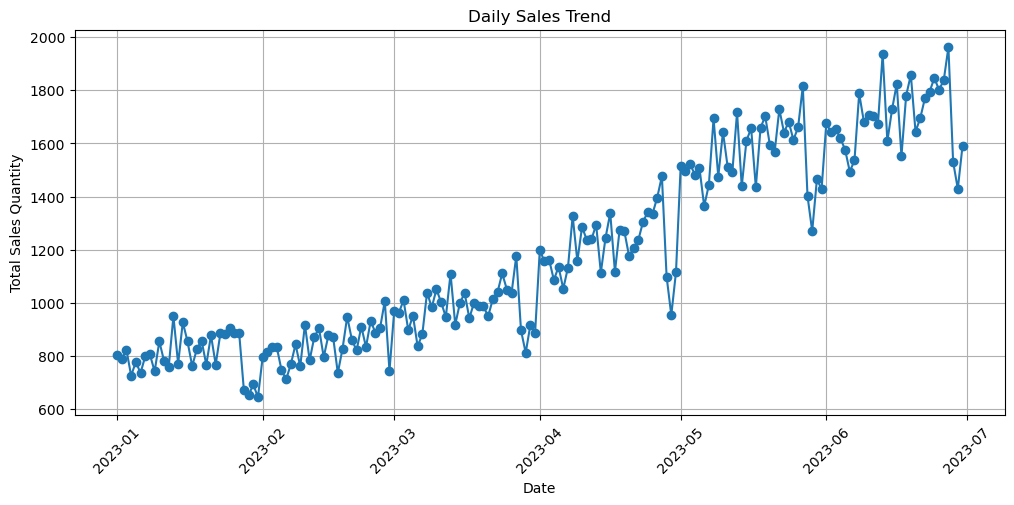

In [13]:
# Convert transaction_date to datetime format
df["transaction_date"] = pd.to_datetime(df["transaction_date"])

# Calculate total sales per day
daily_sales = df.groupby("transaction_date")["transaction_qty"].sum().reset_index()

# Plot daily sales trend
plt.figure(figsize=(12, 5))
plt.plot(daily_sales["transaction_date"], daily_sales["transaction_qty"], marker='o', linestyle='-')

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Total Sales Quantity")
plt.title("Daily Sales Trend")
plt.xticks(rotation=45)
plt.grid()

# Show the plot
plt.show()

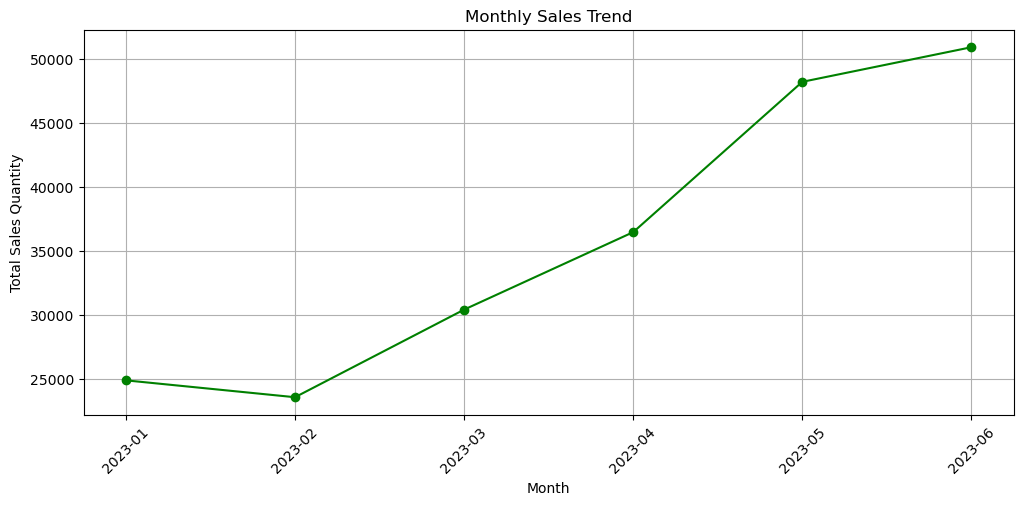

In [14]:
# Extract year and month
df["year_month"] = df["transaction_date"].dt.to_period("M")

# Calculate total sales per month
monthly_sales = df.groupby("year_month")["transaction_qty"].sum().reset_index()

# Convert year_month to string for plotting
monthly_sales["year_month"] = monthly_sales["year_month"].astype(str)

# Plot monthly sales trend
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales["year_month"], monthly_sales["transaction_qty"], marker='o', linestyle='-', color='green')

# Add labels and title
plt.xlabel("Month")
plt.ylabel("Total Sales Quantity")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.grid()

# Show the plot
plt.show()

## Which product type has the highest average price, and how does it impact sales?

Product type with the highest average price:
     product_type  unit_price
24  Premium Beans   34.028274

Average Price and Total Sales for Each Product Type:
             product_type  unit_price  transaction_qty
24          Premium Beans   34.028274              406
8                Clothing   27.886878              221
20          Organic Beans   20.287952              420
12          Gourmet Beans   18.573770              366
18      House blend Beans   18.000000              183
11         Espresso Beans   17.430251              319
19             Housewares   13.448669              555
9      Drinking Chocolate   10.255789              266
14            Green beans   10.000000              134
7                Chai tea    9.709368              443
15              Green tea    9.250000              159
16             Herbal tea    8.950000              305
2               Black tea    8.950000              303
21      Organic Chocolate    7.600000              221
17          Hot 

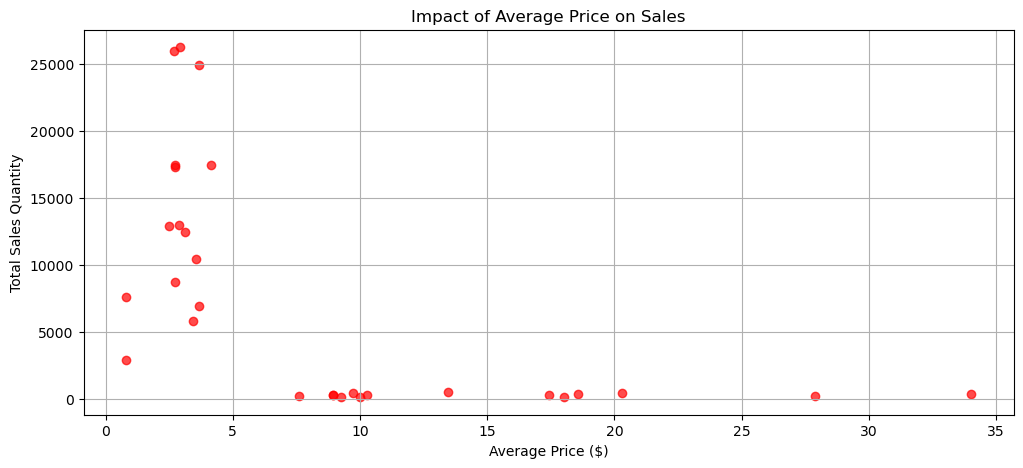

In [15]:
# Calculate the average unit price for each product type
avg_price_by_type = df.groupby("product_type")["unit_price"].mean().reset_index()

# Find the product type with the highest average price
highest_avg_price = avg_price_by_type.sort_values(by="unit_price", ascending=False).head(1)
print("Product type with the highest average price:")
print(highest_avg_price)

# Analyze its total sales (transaction quantity)
sales_by_type = df.groupby("product_type")["transaction_qty"].sum().reset_index()

# Merge price and sales data
price_sales_analysis = avg_price_by_type.merge(sales_by_type, on="product_type")

# Sort by average price in descending order
price_sales_analysis = price_sales_analysis.sort_values(by="unit_price", ascending=False)

# Display the price vs sales data
print("\nAverage Price and Total Sales for Each Product Type:")
print(price_sales_analysis)

# Plot the impact of price on sales
plt.figure(figsize=(12, 5))
plt.scatter(price_sales_analysis["unit_price"], price_sales_analysis["transaction_qty"], color='red', alpha=0.7)
plt.xlabel("Average Price ($)")
plt.ylabel("Total Sales Quantity")
plt.title("Impact of Average Price on Sales")
plt.grid()

# Show the plot
plt.show()


## Is there a correlation between transaction quantity and product price?

Correlation between Unit Price and Transaction Quantity: -0.12


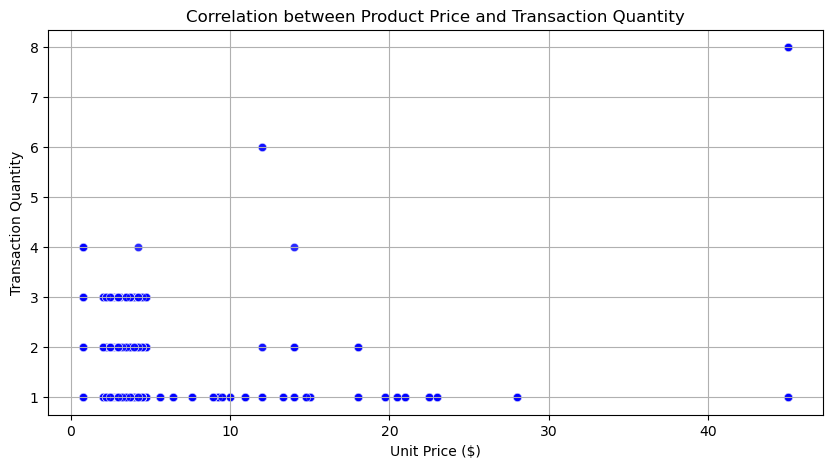

In [16]:
# Calculate Pearson correlation between unit_price and transaction_qty
correlation = df["unit_price"].corr(df["transaction_qty"])
print(f"Correlation between Unit Price and Transaction Quantity: {correlation:.2f}")

# Scatter plot to visualize correlation
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["unit_price"], y=df["transaction_qty"], alpha=0.6, color="blue")

# Add labels and title
plt.xlabel("Unit Price ($)")
plt.ylabel("Transaction Quantity")
plt.title("Correlation between Product Price and Transaction Quantity")
plt.grid()

# Show the plot
plt.show()

## . What is the customer spending behavior? (Distribution of transaction values)

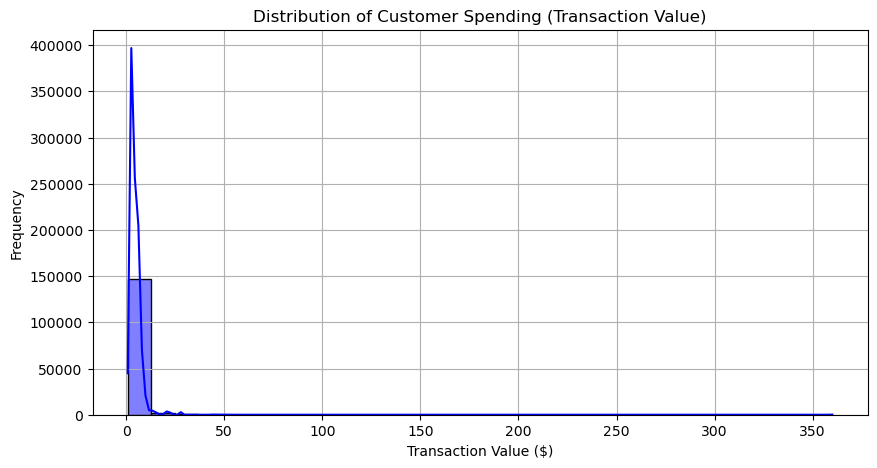

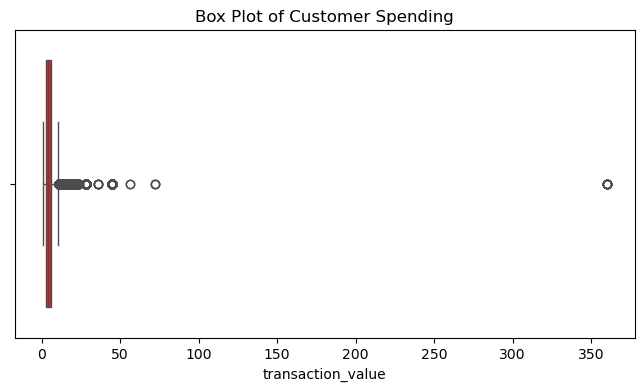

In [17]:
# Calculate transaction value (total spent per transaction)
df["transaction_value"] = df["transaction_qty"] * df["unit_price"]

# Plot histogram to see spending distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["transaction_value"], bins=30, kde=True, color="blue")

# Add labels and title
plt.xlabel("Transaction Value ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Customer Spending (Transaction Value)")
plt.grid()

# Show the histogram
plt.show()

# Box plot to detect spending outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["transaction_value"], color="red")


plt.title("Box Plot of Customer Spending")

# Show the box plot
plt.show()


## What is the average customer spending per transaction?

In [20]:
# Calculate transaction value (Total spending per transaction)
df["transaction_value"] = df["transaction_qty"] * df["unit_price"]

# Compute average spending per transaction
average_spending = df["transaction_value"].mean()

# Display result
print(f"Average Customer Spending per Transaction: ${average_spending:.2f}")


Average Customer Spending per Transaction: $4.69
